### Posterior predictive tests.
Refer back to the medical trial pre-class work notebook from
Session 8.1. The notebook contains a non-hierarchical model (first) and a hierarchical
model (second).

For the non-hierarchical model and the control group half of the data set, choose a test
statistic to show that the non-hierarchical model does not explain the control group data
well. You should generate posterior data samples from this model and compare the test
statistic of the real data to the distribution under your samples from the posterior. Note that
the posterior distribution for this model is already provided in the notebook, so you don’t
have to calculate it.

### Eczema Medical Trial Dataset


|Study          | Treatment group |   Control group  |
|---------------|-----------------|------------------|
|Di Rienzo 2014 |     20 / 23     |        9 / 15    |
|Galli 1994     |     10 / 16     |       11 / 18    |
|Kaufman 1974   |     13 / 16     |        4 / 10    |
|Qin 2014       |     35 / 45     |       21 / 39    |
|Sanchez 2012   |     22 / 31     |       12 / 29    |
|Silny 2006     |      7 / 10     |        0 / 10    |
|**Totals**     |    107 / 141    |       57 / 121   |


**Model 1:**

* For each group (treatment and control), all 6 studies have the same fixed, but unknown, probability of success, $\theta_t,\theta_c\in[0,1]$.
* The data follow a binomial distribution in each study, conditioned on the probability of success — $\theta_t$ for treatment or $\theta_c$ for control.
* The priors over $\theta_t$ and $\theta_c$ are uniform.

These assumptions lead to the following model.

* Likelihood: $\prod_{i=1}^6 \text{Binomial}(s_i\,|\,\theta, n_i)$, where $s_i$ is the number of successful recoveries, $f_i$ is the number of failures (did not recover), and $n_i=s_i+f_i$ the number of patients.

* Prior: $\text{Beta}(\theta\,|\,1,1)$ for both $\theta_t$ and $\theta_c$.

* Posterior for treatment group: $\text{Beta}(\theta_t\,|\,108, 35)$.

* Posterior for control group: $\text{Beta}(\theta_c\,|\,58, 65)$.

In [19]:
#import libraries
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [84]:
#success count in the control groups
control = [9,11,4,21,12,0]

#size of the control groups
control_size = [15,18,10,39,29,10]

#get the range between the highest success rate vs the lowest success rate among the different control group trials
def test_statistic(data):
    success_rates = [data[i]/control_size[i] for i in range(len(control_size))]
    range_ = max(success_rates) - min(success_rates)
    return range_

real test statistic:  0.6111111111111112
mean test statistic from 1000 replications:  0.3188969348659003
p-val:  0.012


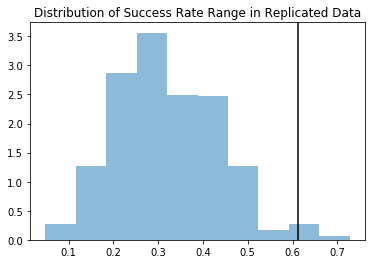

In [93]:
#Generate samples from the posterior distribution for the control group.
posterior_samples = stats.beta.rvs(a=58,b=65,size=1000)
test_statistics =[]
#Using the generated samples, generate a replicated dataset with the same size as the real dataset.
#The replicated dataset is generated from the likelihood function, conditioned on the sampled θ .
for i in posterior_samples:
    #rep_total is a list of 6 integers, representing 6 control group trials, much like the "control" list defined above.
    rep_total = [int(stats.binom.rvs(control_size[j],i,size=1)) for j in range(len(control_size))]
    test_statistics.append(test_statistic(rep_total))
    
real_test_statistic = test_statistic(control)
print("real test statistic: ",real_test_statistic)
print("mean test statistic from 1000 replications: ", np.mean(test_statistics))

plt.hist(test_statistics, alpha=0.5, density=True)
plt.title("Distribution of Success Rate Range in Replicated Data")
plt.axvline(real_test_statistic, color='black')

p_val = sum([1 for i in test_statistics if i > real_test_statistic])/len(test_statistics)
print('p-val: ',p_val)